In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, OneHotEncoder



In [ ]:
df = pd.read_csv("/content/new.csv")
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.drop(['Z_Revenue','Z_CostContact'],axis=1,inplace=True)
df["Age"] = 2014 - df["Year_Birth"]
df.drop(['Year_Birth'],axis=1,inplace=True)

In [ ]:
#education_dummies = pd.get_dummies(df['Education'], prefix='Education', drop_first=True)
#df = pd.concat([df.drop('Education', axis=1), education_dummies], axis=1)

In [ ]:
# Convert to datetime format
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst=True)

# Calculate Customer Tenure in days
df["Customer_Tenure"] = (df["Dt_Customer"].max() - df["Dt_Customer"]).dt.days
df["Children"] = df["Kidhome"] + df["Teenhome"]



In [ ]:
#parts = df["Dt_Customer"].str.split("-", n=3, expand=True)
#df["day"] = parts[0].astype('int')
#df["month"] = parts[1].astype('int')
#df["year"] = parts[2].astype('int')

In [ ]:
df.drop(['Dt_Customer','Kidhome','Teenhome'],axis=1,inplace=True)

In [ ]:
print(df['Marital_Status'].unique())
df['Marital_Status']=df['Marital_Status'].map({'Married':1,'Single':0,'Divorced':2,'Together':3,'Widow':4,'Alone':5,'Absurd':6,'YOLO':7})

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [ ]:
df['Education'].unique()
df['Education'] = df['Education'].map({'Basic':0,'2n Cycle':1,'Graduation':2,'Master':3,'PhD':4})

In [ ]:
df

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Tenure,Children
0,5524,2,0,58138.0,58,635,88,546,172,88,...,0,0,0,0,0,0,1,57,663,0
1,2174,2,0,46344.0,38,11,1,6,2,1,...,0,0,0,0,0,0,0,60,113,2
2,4141,2,3,71613.0,26,426,49,127,111,21,...,0,0,0,0,0,0,0,49,312,0
3,6182,2,3,26646.0,26,11,4,20,10,3,...,0,0,0,0,0,0,0,30,139,1
4,5324,4,1,58293.0,94,173,43,118,46,27,...,0,0,0,0,0,0,0,33,161,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,2,1,61223.0,46,709,43,182,42,118,...,0,0,0,0,0,0,0,47,381,1
2236,4001,4,3,64014.0,56,406,0,30,0,0,...,0,0,0,1,0,0,0,68,19,3
2237,7270,2,2,56981.0,91,908,48,217,32,12,...,0,1,0,0,0,0,0,33,155,0
2238,8235,3,3,69245.0,8,428,30,214,80,30,...,0,0,0,0,0,0,0,58,156,1


In [ ]:
# Check how many missing values are in each column
print(df.isnull().sum())

# Fill missing income values with the median income
df["Income"].fillna(df["Income"].median(), inplace=True)

# Confirm no missing values remain
print(df.isnull().sum())


ID                      0
Education               0
Marital_Status          0
Income                 24
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Age                     0
Customer_Tenure         0
Children                0
dtype: int64
ID                     0
Education              0
Marital_Status         0
Income                 0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurch

In [ ]:
df = df.dropna()
print("Total values in the dataset after removing the null values:", len(df))

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
data_scaled_df = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   float64
 1   Education            2240 non-null   float64
 2   Marital_Status       2240 non-null   float64
 3   Income               2240 non-null   float64
 4   Recency              2240 non-null   float64
 5   MntWines             2240 non-null   float64
 6   MntFruits            2240 non-null   float64
 7   MntMeatProducts      2240 non-null   float64
 8   MntFishProducts      2240 non-null   float64
 9   MntSweetProducts     2240 non-null   float64
 10  MntGoldProds         2240 non-null   float64
 11  NumDealsPurchases    2240 non-null   float64
 12  NumWebPurchases      2240 non-null   float64
 13  NumCatalogPurchases  2240 non-null   float64
 14  NumStorePurchases    2240 non-null   float64
 15  NumWebVisitsMonth    2240 non-null   f

In [ ]:
df

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Tenure,Children
0,5524,2,0,58138.0,58,635,88,546,172,88,...,0,0,0,0,0,0,1,57,663,0
1,2174,2,0,46344.0,38,11,1,6,2,1,...,0,0,0,0,0,0,0,60,113,2
2,4141,2,3,71613.0,26,426,49,127,111,21,...,0,0,0,0,0,0,0,49,312,0
3,6182,2,3,26646.0,26,11,4,20,10,3,...,0,0,0,0,0,0,0,30,139,1
4,5324,4,1,58293.0,94,173,43,118,46,27,...,0,0,0,0,0,0,0,33,161,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,2,1,61223.0,46,709,43,182,42,118,...,0,0,0,0,0,0,0,47,381,1
2236,4001,4,3,64014.0,56,406,0,30,0,0,...,0,0,0,1,0,0,0,68,19,3
2237,7270,2,2,56981.0,91,908,48,217,32,12,...,0,1,0,0,0,0,0,33,155,0
2238,8235,3,3,69245.0,8,428,30,214,80,30,...,0,0,0,0,0,0,0,58,156,1


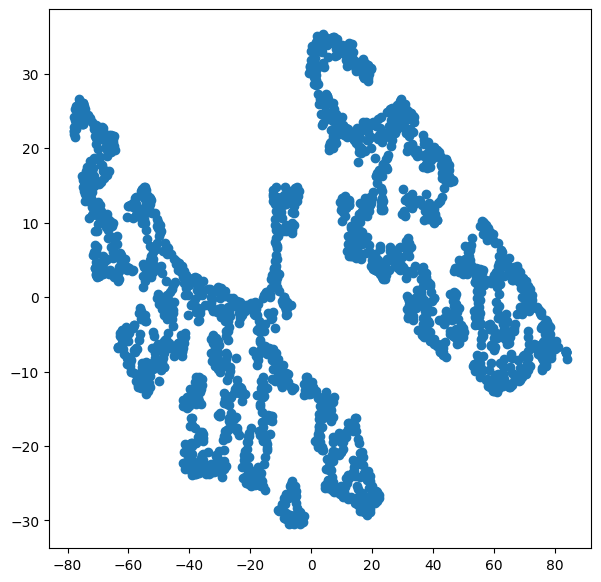

In [ ]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(df)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

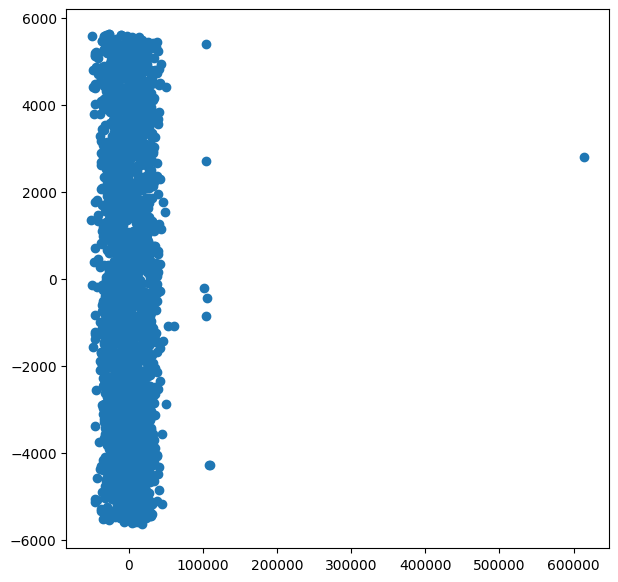

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df)
plt.figure(figsize=(7, 7))
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.show()

Text(0, 0.5, 'WCSS')

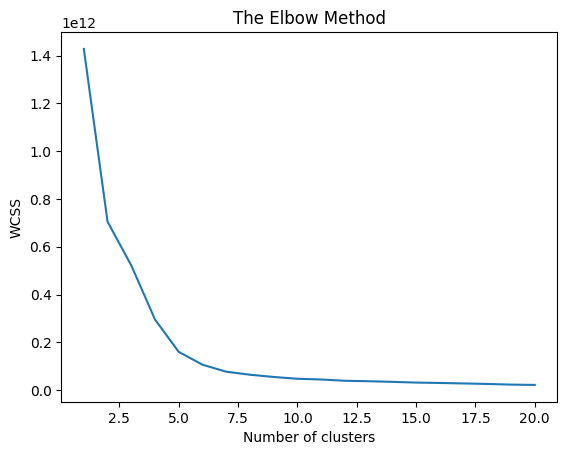

In [ ]:
#elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, random_state=22)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 21), wcss, curve='convex', direction='decreasing')
print(kl.elbow)

5


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for i in range(2, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++',max_iter=500, random_state=22)
    kmeans.fit(df)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))

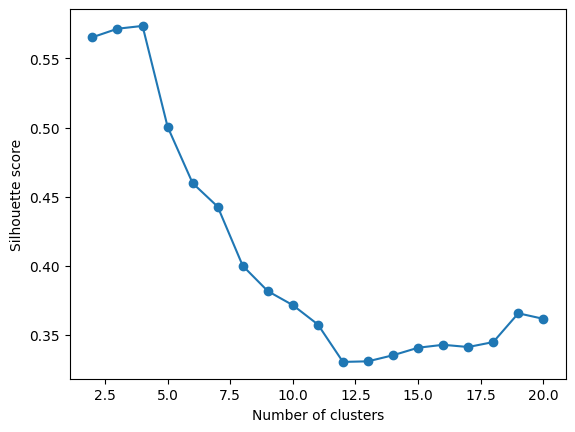

In [ ]:
#plot
plt.plot(range(2, 21), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [ ]:
silhouette_scores

[np.float64(0.5653255145714537),
 np.float64(0.5714816567501063),
 np.float64(0.5735095653327912),
 np.float64(0.5005440327443653),
 np.float64(0.4597354489264594),
 np.float64(0.4427205891370904),
 np.float64(0.39993579159076714),
 np.float64(0.38163295756556376),
 np.float64(0.37147115524391733),
 np.float64(0.3574729188450035),
 np.float64(0.3304042321317887),
 np.float64(0.3308350453125251),
 np.float64(0.3352394078397374),
 np.float64(0.3406775179003043),
 np.float64(0.34279662077476153),
 np.float64(0.34118879736093743),
 np.float64(0.34476422343848256),
 np.float64(0.365592734074105),
 np.float64(0.3615699074053338)]

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(init='k-means++',
               n_clusters=5,
               max_iter=500,
               random_state=22)
segments = model.fit_predict(df)

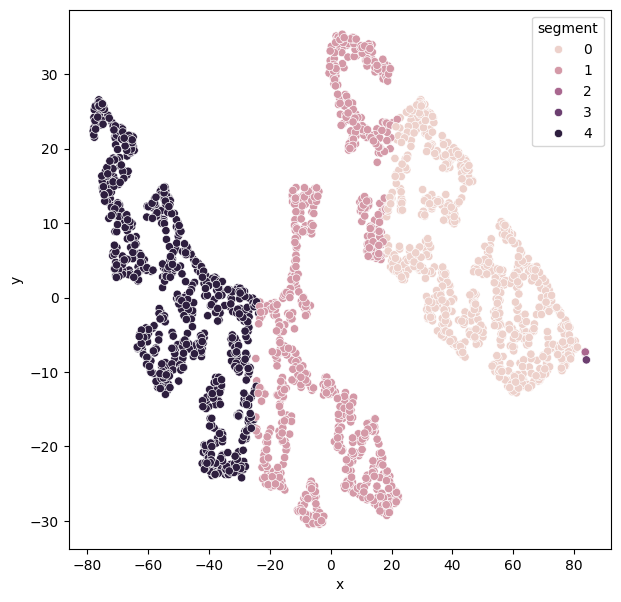

In [ ]:
plt.figure(figsize=(7, 7))

df_tsne = pd.DataFrame({'x': tsne_data[:, 0], 'y': tsne_data[:, 1], 'segment': segments})

sns.scatterplot(x='x', y='y', hue='segment', data=df_tsne)
plt.show()